### **Hypothetical Business Case**:

The real estate agency, N_Move-in Realtors, gathered data from the previous year to analyze a newly developed area in Wellinborough, Northampton. With the objective of predicting house prices, this data was collected to provide valuable insights to landlords seeking to determine the market value of their properties for potential buyers. As the newly appointed data scientist, my task was to develop a model capable of accurately predicting house prices based on key features such as house age, distance to convenience stores, and distance to the nearest MRT station.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r".\Real estate.csv")

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Data Cleaning

In [4]:
df.drop(columns=['No','X1 transaction date','X5 latitude', 'X6 longitude' ], inplace=True)

In [6]:
df.rename(columns={'X2 house age':'house_age','X3 distance to the nearest MRT station': 'dist_MRT_sta','X4 number of convenience stores':'no_con_store', 'Y house price of unit area':'house_price'}, inplace=True)

In [7]:
df.head()

,house_age,dist_MRT_sta,no_con_store,house_price
0,32.0,84.87882,10,37.9
1,19.5,306.59470,9,42.2
2,13.3,561.98450,5,47.3
3,13.3,561.98450,5,54.8
4,5.0,390.56840,5,43.1


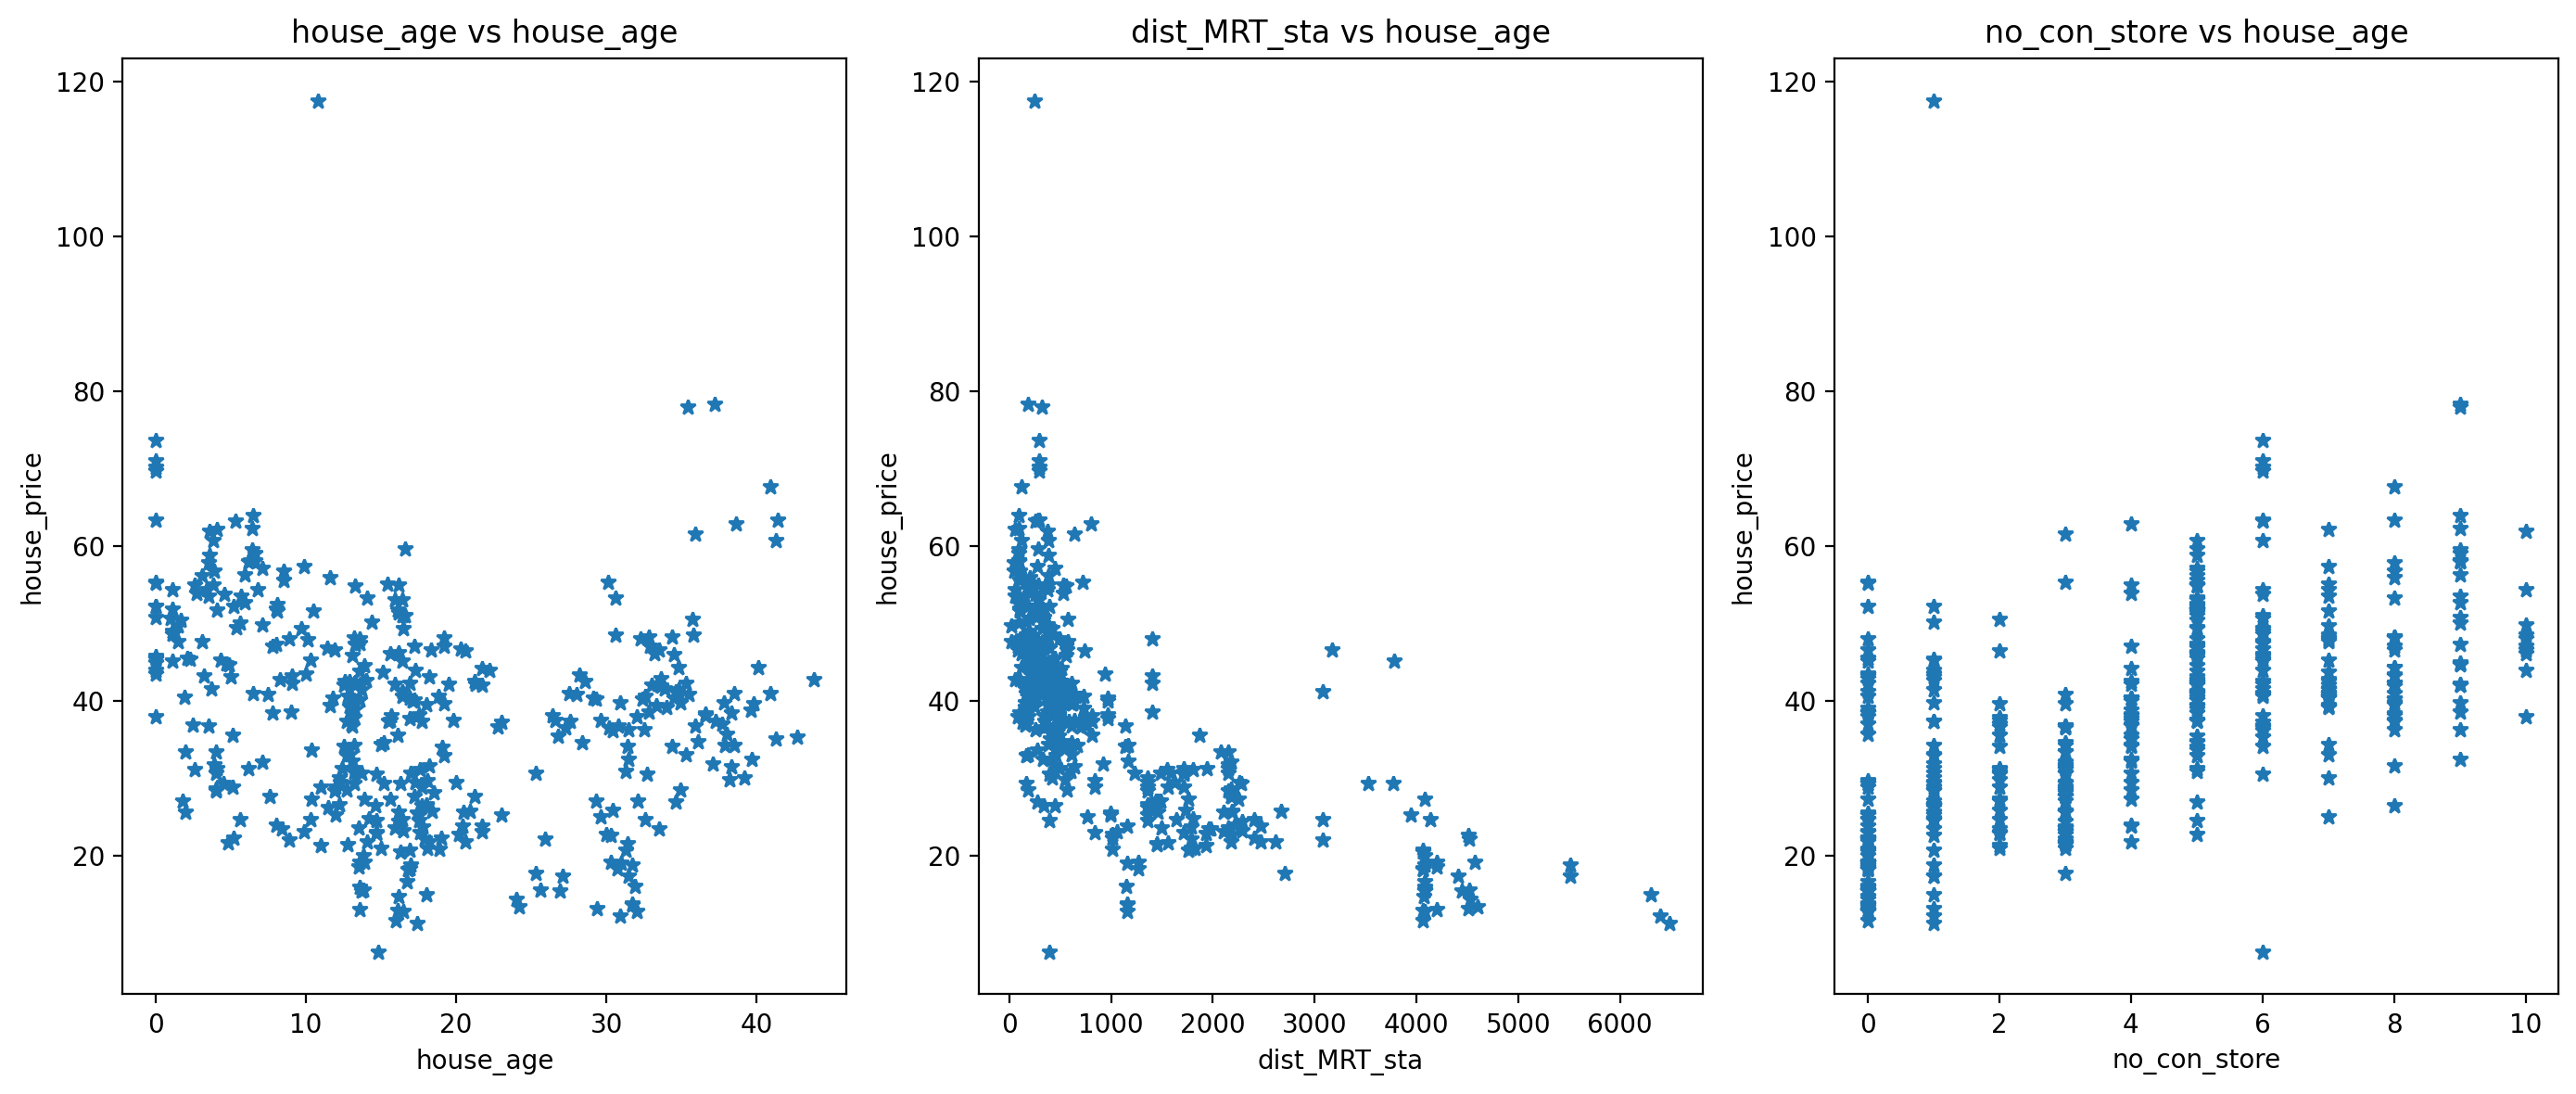

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 6), dpi=200)

ax[0].plot(df['house_age'], df['house_price'], '*')
ax[0].set_xlabel('house_age')
ax[0].set_ylabel('house_price')
ax[0].set_title('house_age vs house_age')


ax[1].plot(df['dist_MRT_sta'], df['house_price'], '*')
ax[1].set_xlabel('dist_MRT_sta')
ax[1].set_ylabel('house_price')
ax[1].set_title('dist_MRT_sta vs house_age')


ax[2].plot(df['no_con_store'], df['house_price'], '*')
ax[2].set_xlabel('no_con_store')
ax[2].set_ylabel('house_price')
ax[2].set_title('no_con_store vs house_age')

plt.tight_layout()
plt.show()

**Notes:**

- From the above, distance to MRT station has a strong inverse relationship to the price; the lower the distance the higher the price.
- From the above, the age of the house seem to have no strong effect on the house price
- The number of conveninece stores have a positive relationship with the house price; the more the conveniences stores, the higher the price.

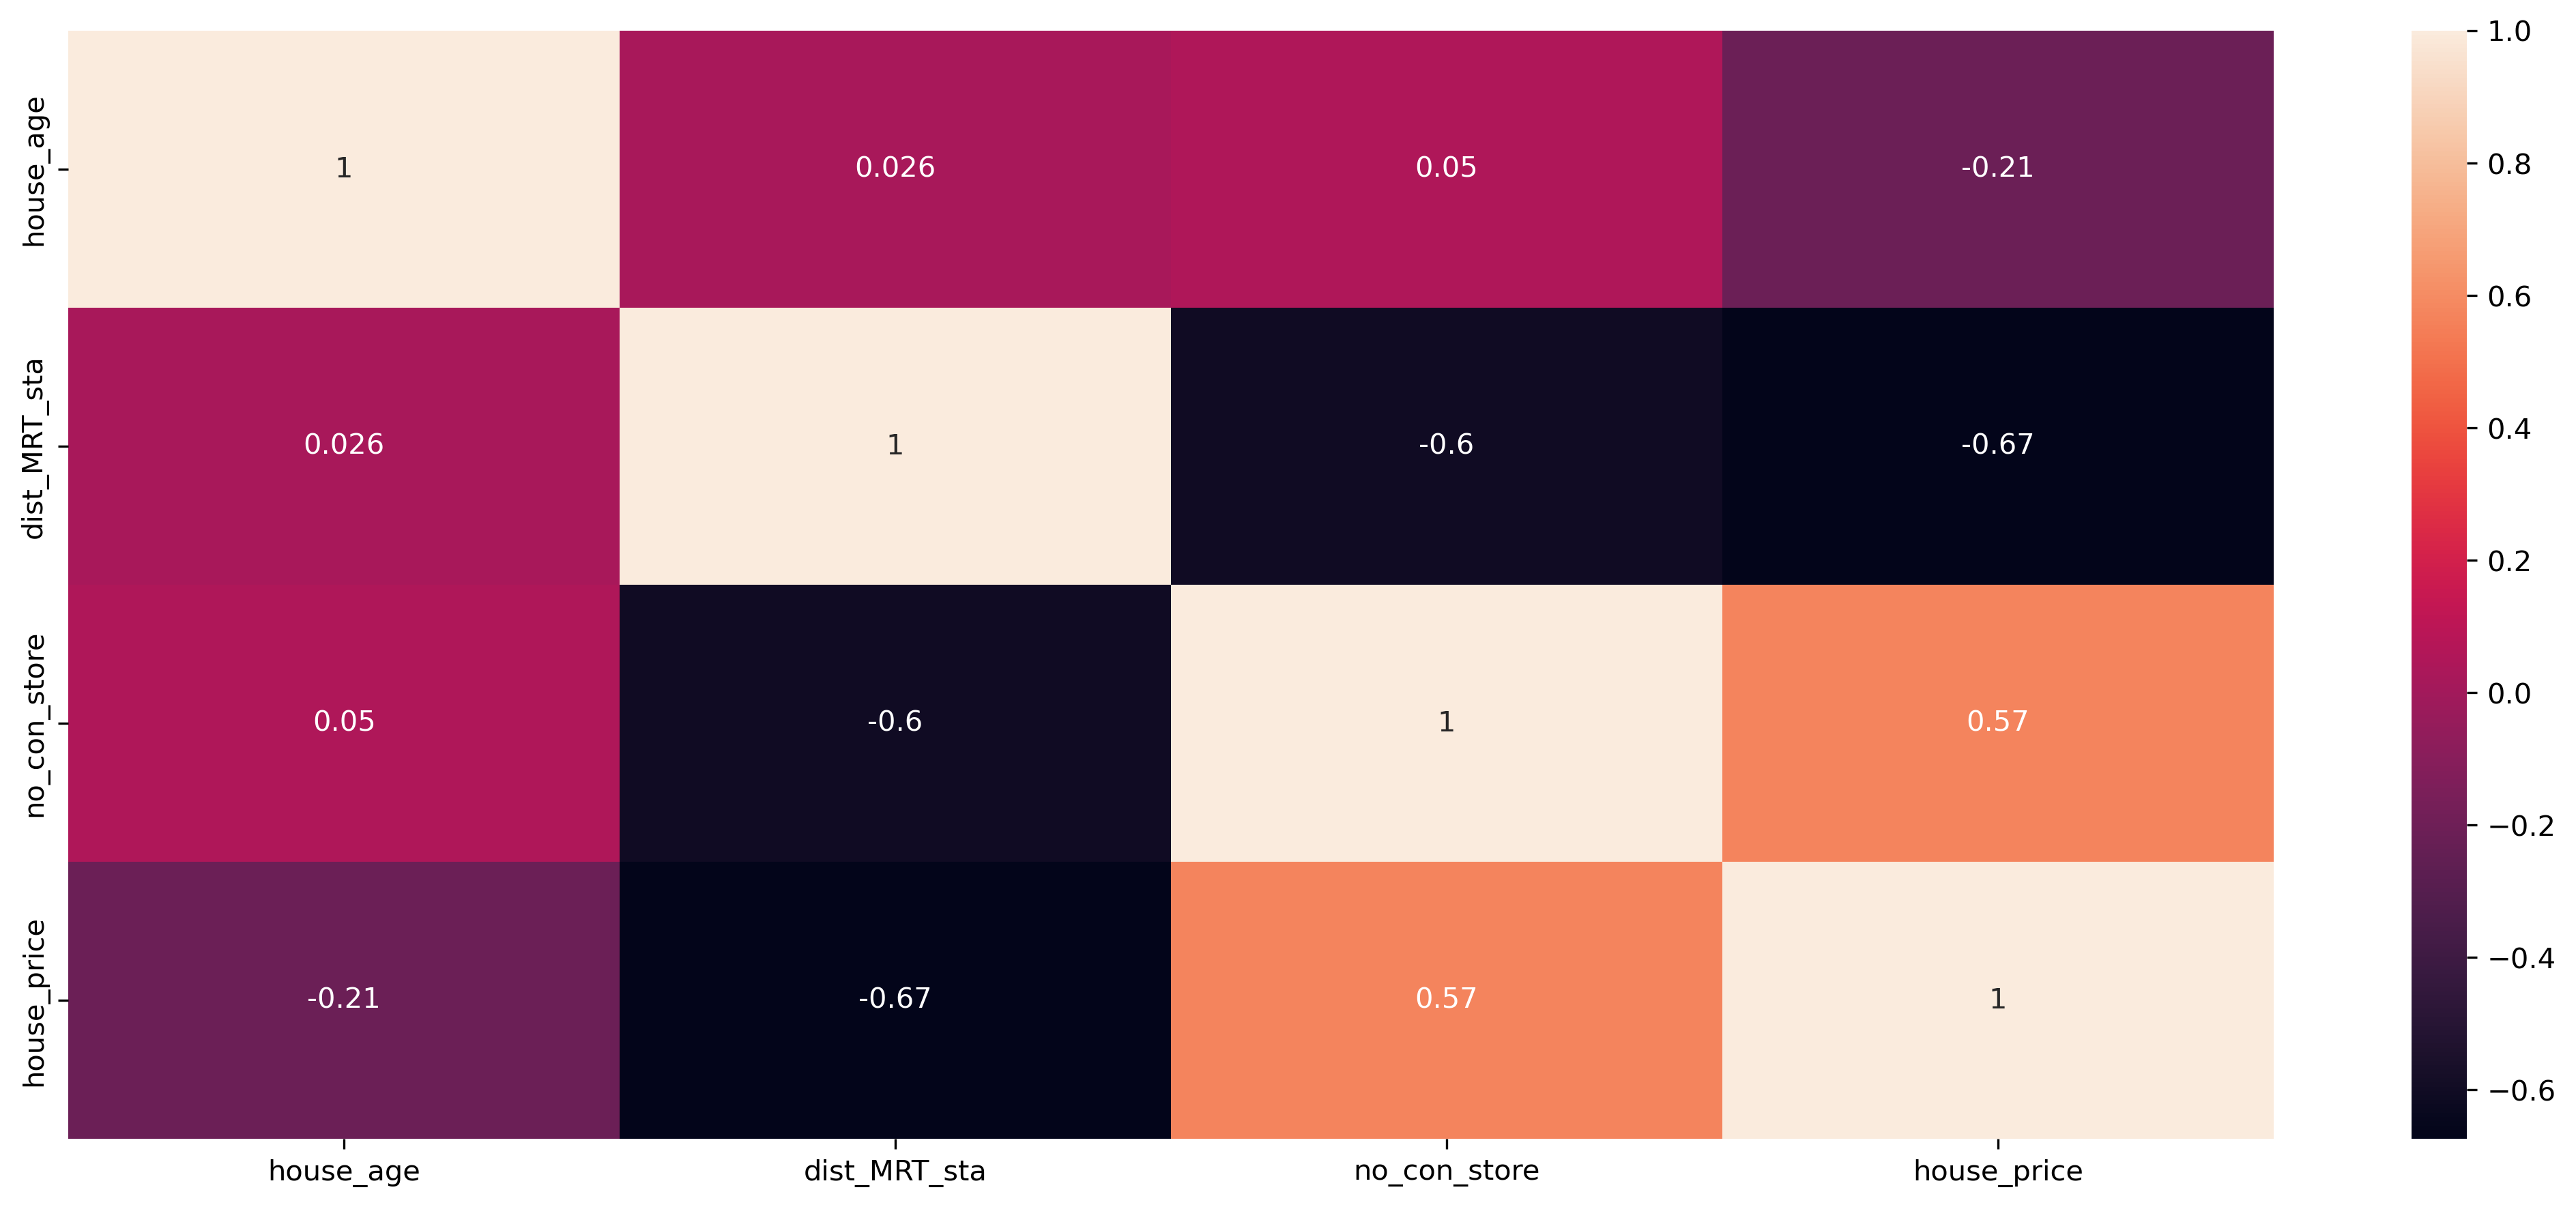

In [9]:
plt.figure(figsize=(14,6), dpi=300)

sns.heatmap(df.corr(), annot=True)

plt.tight_layout()
plt.show()

**Notes**:

From the heatmap correlation diagram:
- the higher the distance to an MRT store, the lower the price. There's an inverse relationship. Hence, it's negative
- The age of the hosue seems to follow in an inverse relationship pattern with the price of the house; the higher the age, the lower the price. This could be because new houses come with modernized house equipment anmd designs than the older houses.
- The number of convenience stores have a positive relationship; the more the convenience stores- the higher the price.

### Define & Split the dataset

In [10]:
X= df.drop('house_price', axis=1)
y= df['house_price']

#### Train|Test|Split

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

#### Data Dimension

In [13]:
X_train.shape

# # 80%

(331, 3)

In [14]:
X_test.shape

# # 20%

(83, 3)

### Linear Regression Model

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()

lin_model.fit(X_train, y_train)

y_pred = lin_model.predict(X_test)

# Metrics

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
coef = lin_model.coef_

print('Using Linear Regression:\n\nthe MAE is:', mae, '\nthe RMSE is:', rmse, '\nthe R2 score is:', r2, '\nthe Coef is:', coef)

Using Linear Regression:

the MAE is: 7.134280616424499 
the RMSE is: 9.983424849795908 
the R2 score is: 0.4534255433018419 
the Coef is: [-0.27060981 -0.00550487  1.17473128]


### Ridge Regression (L2 Regularization)

In [16]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.5)

ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

# Metrics

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
coef = ridge_model.coef_

print('Using Ridge Regression at Alpha 0.5:\n\nthe MAE is:', mae, '\nthe RMSE is:', rmse, '\nthe R2 score is:', r2, '\nthe Coef is:', coef)

Using Ridge Regression at Alpha 0.5:

the MAE is: 7.134318591690922 
the RMSE is: 9.983536627340133 
the R2 score is: 0.4534133039965046 
the Coef is: [-0.27060287 -0.00550532  1.17439856]


#### Ridge Regression (Alpha-.001)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.0001)
# Can't use solcing for Ridge Regression- only for Ridge CV

ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

# Metrics

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
coef = ridge_model.coef_

print('Using Ridge Regression at Alpha .001:\n\nthe MAE is:', mae, '\nthe RMSE is:', rmse, '\nthe R2 score is:', r2, '\nthe Coef is:', coef)

Using Ridge Regression at Alpha .001:

the MAE is: 7.134280624021592 
the RMSE is: 9.983424872151428 
the R2 score is: 0.4534255408539932 
the Coef is: [-0.27060981 -0.00550487  1.17473122]


#### Ridge Regression (Alpha-0.0)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.0)

ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

# Metrics

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
coef = ridge_model.coef_
r2 = r2_score(y_test, y_pred)

print('Using Ridge Regression at Alpha 0.0:\n\nthe MAE is:', mae, '\nthe RMSE is:', rmse, '\nthe R2 score is:', r2, '\nthe Coef is:', coef)

Using Ridge Regression at Alpha 0.0:

the MAE is: 7.134280616424499 
the RMSE is: 9.983424849795906 
the R2 score is: 0.45342554330184204 
the Coef is: [-0.27060981 -0.00550487  1.17473128]


### Ridge CV

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.linear_model import RidgeCV

ridgecv_model = RidgeCV(alphas=(0.005, 0.00005, 0.001), scoring = 'neg_mean_absolute_error')

ridgecv_model.fit(X_train, y_train)

y_pred = ridgecv_model.predict(X_test)

# Metrics

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
residual= y_test-y_pred

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
coef = ridgecv_model.coef_

print('Using Ridge Regression CV at an optimal alpha .005:\n\nthe MAE is:', mae, '\nthe RMSE is:', rmse, '\nthe R2 score is:', r2, '\nthe Coef is:', coef)

Using Ridge Regression CV at an optimal alpha .005:

the MAE is: 5.507843305934233 
the RMSE is: 7.073327044109009 
the R2 score is: 0.563817550889042 
the Coef is: [-0.27137426 -0.00561047  1.41767531]


In [21]:
ridgecv_model.alpha_

5e-05

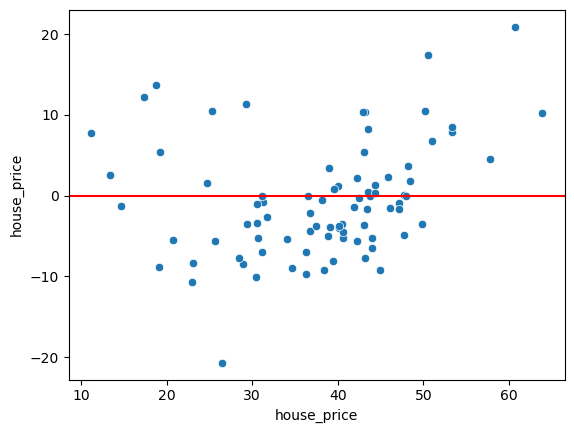

In [22]:
y_pred = ridgecv_model.predict(X_test)
residual= y_test - y_pred

sns.scatterplot(x=y_test,y= residual)
plt.axhline(y=0, color='red')

# The residual are heteroskedastic

### To Deploy

In [23]:
finalcv_model = RidgeCV(alphas=(0.005, 0.00005, 0.001), scoring = 'neg_mean_absolute_error')

finalcv_model.fit(X, y)

y_pred = finalcv_model.predict(X)

finalcv_model.coef_

array([-0.25285576, -0.00537984,  1.29743961])

In [24]:
from joblib import dump, load

In [25]:
dump(finalcv_model, 'house_model.joblib')

['house_model.joblib']

In [26]:
model = load('house_model.joblib')

In [27]:
model.coef_

array([-0.25285576, -0.00537984,  1.29743961])

#### **Conclusion with Model Caveats:**

After evaluating different regression models, including Linear Regression and Ridge Regression with various alpha values, Ridge Regression CV with an optimal alpha of 0.005 was selected as the preferred model. This decision was based on its superior performance, as evidenced by the lowest Mean Absolute Error (MAE) among the tested models. However, it's important to acknowledge certain caveats associated with the model.

The model's ability to accurately predict house prices relies on the assumption that the selected features—house age, distance to convenience stores, and distance to the nearest MRT station—retain their significance in today's real estate context. Given the dynamic nature of the housing market, changes in economic conditions, urban development, and societal preferences may have altered the relevance of these features over time.

Furthermore, while the model identifies significant relationships between the chosen features and house prices, it's essential to recognize the potential existence of other unexplored variables that could exert a stronger influence on property values. These unaccounted-for factors may possess considerable predictive power and could significantly impact house prices in ways not captured by the model.

Continued monitoring of market trends and consideration of additional influential factors will be used as the market evolves.